In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [97]:
KO_indels1_df = pd.read_table('KO_indels.csv', sep=',')    # sep splits the table into columns
KO_indels2_df = pd.read_table('KO_indels_rep2.csv', sep=',')
KO_indels3_df = pd.read_table('KO_indels_rep3.csv', sep=',')

OE_indels1_df = pd.read_table('OE_indels.csv', sep=',')    # sep splits the table into columns
OE_indels2_df = pd.read_table('OE_indels_rep2.csv', sep=',')
OE_indels3_df = pd.read_table('OE_indels_rep3.csv', sep=',')

suffix_df = pd.read_table('suffix_clarification.csv', sep=',')

,Unnamed: 0,SampleName,Position,Reference,Variant,Counts,MeanQ,BProbability,Type,Freq,VarCode,length_of_indel
0,7,G2_white_snpcall.txt,2054,G,-T,4,0.0,0.000036,indel,0.000025,2054--T,1
1,18,G2_white_snpcall.txt,2057,T,-G,1,0.0,0.000023,indel,0.000006,2057--G,1
2,23,G2_white_snpcall.txt,2058,G,-A,1,0.0,0.000023,indel,0.000006,2058--A,1
3,38,G2_white_snpcall.txt,2062,C,-A,3,0.0,0.000019,indel,0.000019,2062--A,1
4,41,G2_white_snpcall.txt,2063,A,-G,5,0.0,0.000089,indel,0.000031,2063--G,1
5,52,G2_white_snpcall.txt,2065,G,-C,1,0.0,0.000023,indel,0.000006,2065--C,1
6,56,G2_white_snpcall.txt,2066,C,-G,8,0.0,0.002180,indel,0.000050,2066--G,1
7,66,G2_white_snpcall.txt,2068,G,+C,1,0.0,0.000023,indel,0.000006,2068-+C,1
8,88,G2_white_snpcall.txt,2074,G,-A,1,0.0,0.000023,indel,0.000006,2074--A,1
9,99,G2_white_snpcall.txt,2077,G,-T,3,0.0,0.000019,indel,0.000019,2077--T,1


In [62]:
def getGenotype(label_data, suffix_row):
    genotype = suffix_row.get('Genotype')
    
    rep1 = suffix_row.get('Suffix for replicate 1')
    rep2 = suffix_row.get('suffix for replicate 2')
    rep3 = suffix_row.get('suffix for replicate 3')
    
    pattern1 = r"(?<!\d){}(?!\d)".format(rep1)
    pattern2 = r"(?<!\d){}(?!\d)".format(rep2)
    pattern3 = r"(?<!\d){}(?!\d)".format(rep3)
    
    
    if ('white' in label_data):
        return 'Wildtype'
    
    
    if (re.search(pattern1, label_data) or re.search(pattern2, label_data) or re.search(pattern3, label_data)):
        return genotype
    return None


def getGenotypeArray(inputTable):
    genotypes = [] 
    suffix_alt = suffix_df
   
    for label in inputTable['SampleName']:
        finalGenotype = 'Blank'
        for index, row in suffix_alt.iterrows():
            genotype = getGenotype(label, row)
            if genotype is not None:
                finalGenotype = genotype
        genotypes.append(finalGenotype)
    return genotypes


In [98]:
# Generate genotype array for each indel table
KOgenotypes1 = getGenotypeArray(KO_indels1_df)
KOgenotypes2 = getGenotypeArray(KO_indels2_df)
KOgenotypes3 = getGenotypeArray(KO_indels3_df)

OEgenotypes1 = getGenotypeArray(OE_indels1_df)
OEgenotypes2 = getGenotypeArray(OE_indels2_df)
OEgenotypes3 = getGenotypeArray(OE_indels3_df)

# Add genotype labels to indel table
# Consolidate table to only include necessary columns: Genotype, Position, Frequency
KO_indels1_df['Genotype'] = KOgenotypes1
KO_indels2_df['Genotype'] = KOgenotypes2
KO_indels3_df['Genotype'] = KOgenotypes3

OE_indels1_df['Genotype'] = OEgenotypes1
OE_indels2_df['Genotype'] = OEgenotypes2
OE_indels3_df['Genotype'] = OEgenotypes3
    

,Unnamed: 0,SampleName,Position,Reference,Variant,Counts,MeanQ,BProbability,Type,Freq,VarCode,length_of_indel,Genotype
0,6,F2_white_snpcall.txt,2054,G,-T,4,0.0,0.000036,indel,0.000025,2054--T,1,Wildtype
1,17,F2_white_snpcall.txt,2057,T,-G,1,0.0,0.000023,indel,0.000006,2057--G,1,Wildtype
2,22,F2_white_snpcall.txt,2058,G,-A,1,0.0,0.000023,indel,0.000006,2058--A,1,Wildtype
3,38,F2_white_snpcall.txt,2062,C,-A,1,0.0,0.000023,indel,0.000006,2062--A,1,Wildtype
4,42,F2_white_snpcall.txt,2063,A,-G,5,0.0,0.000087,indel,0.000031,2063--G,1,Wildtype
5,43,F2_white_snpcall.txt,2063,A,-GGC,1,0.0,0.000052,indel,0.000006,2063--GGC,3,Wildtype
6,55,F2_white_snpcall.txt,2066,C,-G,4,0.0,0.000036,indel,0.000025,2066--G,1,Wildtype
7,71,F2_white_snpcall.txt,2070,A,-G,1,0.0,0.000023,indel,0.000006,2070--G,1,Wildtype
8,76,F2_white_snpcall.txt,2071,G,-A,1,0.0,0.000023,indel,0.000006,2071--A,1,Wildtype
9,88,F2_white_snpcall.txt,2074,G,-A,1,0.0,0.000023,indel,0.000006,2074--A,1,Wildtype


QUESTION 2: DOUBLE BAR GRAPH DISPLAYING INDEL FREQUENCY TO THE LEFT AND RIGHT OF THE INDEL

In [99]:
# Select the revelant columns
gen_pos_freq1 = KO_indels1_df[['Genotype', 'Position','Freq']]
gen_pos_freq2 = KO_indels2_df[['Genotype', 'Position','Freq']]
gen_pos_freq3 = KO_indels3_df[['Genotype', 'Position','Freq']]

# Split each table into left of the split or right of the split
tableLeft1 = gen_pos_freq1.where(gen_pos_freq1['Position'] < 2093).dropna()
tableRight1 = gen_pos_freq1.where(gen_pos_freq1['Position'] > 2093).dropna()

tableLeft2 = gen_pos_freq2.where(gen_pos_freq2['Position'] < 2093).dropna()
tableRight2 = gen_pos_freq2.where(gen_pos_freq2['Position'] > 2093).dropna()

tableLeft3 = gen_pos_freq3.where(gen_pos_freq3['Position'] < 2093).dropna()
tableRight3 = gen_pos_freq3.where(gen_pos_freq3['Position'] > 2093).dropna()


# Group each table on the genotype name, sum up the frequency
gen_freq_left1 = tableLeft1.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_left1.rename(columns={'Freq': 'Left Freq 1'}, inplace=True)    # inplace allows the original table to be modified
gen_freq_right1 = tableRight1.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_right1.rename(columns={'Freq': 'Right Freq 1'}, inplace=True)    # inplace allows the original table to be modified

gen_freq_left2 = tableLeft2.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_left2.rename(columns={'Freq': 'Left Freq 2'}, inplace=True)    # inplace allows the original table to be modified
gen_freq_right2 = tableRight2.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_right2.rename(columns={'Freq': 'Right Freq 2'}, inplace=True)    # inplace allows the original table to be modified

gen_freq_left3 = tableLeft3.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_left3.rename(columns={'Freq': 'Left Freq 3'}, inplace=True)    # inplace allows the original table to be modified
gen_freq_right3 = tableRight3.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_right3.rename(columns={'Freq': 'Right Freq 3'}, inplace=True)    # inplace allows the original table to be modified



,Genotype,Left Freq 1,Left Freq 2,Left Freq 3,Left Freq Mean,Left Freq Std,Right Freq 1,Right Freq 2,Right Freq 3,Right Freq Mean,Right Freq Std
0,KU70 KO,0.000280,0.000323,0.000417,0.000340,0.000070,0.001801,0.001751,0.002299,0.001950,0.000303
1,KU80 KO,0.000311,0.000331,0.000363,0.000335,0.000026,0.001567,0.003252,0.001877,0.002232,0.000897
2,MRE11 KO,0.000302,0.000341,0.000306,0.000316,0.000022,0.006297,0.008674,0.004911,0.006627,0.001903
3,MUS81 KO,0.000305,0.000340,0.000272,0.000305,0.000034,0.008167,0.001902,0.002854,0.004308,0.003376
4,RAD51 KO,0.000313,0.000263,0.000364,0.000313,0.000050,0.005524,0.004721,0.122338,0.044194,0.067676
5,RAD52 KO,0.000260,0.000224,0.000280,0.000255,0.000029,0.028169,0.000787,0.002593,0.010516,0.015314
6,SAE2 KO,0.000398,0.000394,0.000568,0.000453,0.000099,0.001927,0.002402,0.003570,0.002633,0.000845
7,Wildtype,0.000235,0.000351,0.000327,0.000304,0.000061,0.000742,0.001349,0.001393,0.001161,0.000364
8,XRS2 KO,0.000344,0.000336,0.000253,0.000311,0.000050,0.002680,0.058022,0.004423,0.021708,0.031460


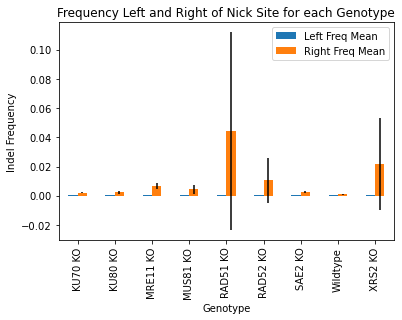

In [100]:
# now combine the individuals tables to create a consolidated table for the left and for the right
tableLeft = pd.merge(gen_freq_left1, gen_freq_left2, on='Genotype')
tableLeft = pd.merge(tableLeft, gen_freq_left3, on='Genotype')
tableLeft['Left Freq Mean'] = tableLeft.iloc[:, 1:4].mean(axis=1)
tableLeft['Left Freq Std'] = tableLeft.iloc[:, 1:4].std(axis=1)

tableRight = pd.merge(gen_freq_right1, gen_freq_right2, on='Genotype')
tableRight = pd.merge(tableRight, gen_freq_right3, on='Genotype')
tableRight['Right Freq Mean'] = tableRight.iloc[:, 1:4].mean(axis=1)
tableRight['Right Freq Std'] = tableRight.iloc[:, 1:4].std(axis=1)

# join tables (can drop the individual frequencies)
KOtableJoined = pd.merge(tableLeft, tableRight, on='Genotype')  # [['Genotype', 'Left Freq Mean', 'Left Freq Std', 'Right Freq Mean', 'Right Freq Std']]

ax = KOtableJoined.plot.bar(x='Genotype', y=['Left Freq Mean', 'Right Freq Mean'], yerr=KOtableJoined[['Left Freq Std', 'Right Freq Std']].T.values)
plt.title('Frequency Left and Right of Nick Site for each Genotype')
plt.ylabel('Indel Frequency')
plt.show()


Do the same steps as above but for the overexpression (OE) data

In [66]:
# Select the revelant columns
OE_gen_pos_freq1 = OE_indels1_df[['Genotype', 'Position','Freq']]
OE_gen_pos_freq2 = OE_indels2_df[['Genotype', 'Position','Freq']]
OE_gen_pos_freq3 = OE_indels3_df[['Genotype', 'Position','Freq']]



# Split each table into left of the split or right of the split
tableLeft1 = OE_gen_pos_freq1.where(OE_gen_pos_freq1['Position'] < 2093).dropna()
tableRight1 = OE_gen_pos_freq1.where(OE_gen_pos_freq1['Position'] > 2093).dropna()

tableLeft2 = OE_gen_pos_freq2.where(OE_gen_pos_freq2['Position'] < 2093).dropna()
tableRight2 = OE_gen_pos_freq2.where(OE_gen_pos_freq2['Position'] > 2093).dropna()

tableLeft3 = OE_gen_pos_freq3.where(OE_gen_pos_freq3['Position'] < 2093).dropna()
tableRight3 = OE_gen_pos_freq3.where(OE_gen_pos_freq3['Position'] > 2093).dropna()


# Group each table on the genotype name, sum up the frequency
gen_freq_left1 = tableLeft1.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_left1.rename(columns={'Freq': 'Left Freq 1'}, inplace=True)    # inplace allows the original table to be modified
gen_freq_right1 = tableRight1.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_right1.rename(columns={'Freq': 'Right Freq 1'}, inplace=True)    # inplace allows the original table to be modified

gen_freq_left2 = tableLeft2.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_left2.rename(columns={'Freq': 'Left Freq 2'}, inplace=True)    # inplace allows the original table to be modified
gen_freq_right2 = tableRight2.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_right2.rename(columns={'Freq': 'Right Freq 2'}, inplace=True)    # inplace allows the original table to be modified

gen_freq_left3 = tableLeft3.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_left3.rename(columns={'Freq': 'Left Freq 3'}, inplace=True)    # inplace allows the original table to be modified
gen_freq_right3 = tableRight3.drop('Position', axis=1).groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq_right3.rename(columns={'Freq': 'Right Freq 3'}, inplace=True)    # inplace allows the original table to be modified


,Genotype,Left Freq 1
0,MRE11 OE,0.000217
1,MRE11KO,0.000217
2,RAD52 KO,0.000218
3,Rad51 KO,0.000290
4,Rad51 OE,0.000215
5,Rad52 OE,0.000464
6,SAE2 KO,0.000263
7,SAE2 OE,0.000212
8,Wildtype,0.000250


,Genotype,Right Freq 1
0,MRE11 OE,0.011467
1,MRE11KO,0.000786
2,RAD52 KO,0.000462
3,Rad51 KO,0.001110
4,Rad51 OE,0.002289
5,Rad52 OE,0.010053
6,SAE2 KO,0.001029
7,SAE2 OE,0.000858
8,Wildtype,0.000838


,Genotype,Left Freq 1,Left Freq 2,Left Freq 3,Left Freq Mean,Left Freq Std,Right Freq 1,Right Freq 2,Right Freq 3,Right Freq Mean,Right Freq Std
0,KU70 KO,0.000280,0.000323,0.000417,0.000340,0.000070,0.001801,0.001751,0.002299,0.001950,0.000303
1,KU80 KO,0.000311,0.000331,0.000363,0.000335,0.000026,0.001567,0.003252,0.001877,0.002232,0.000897
2,MRE11 KO,0.000302,0.000341,0.000306,0.000316,0.000022,0.006297,0.008674,0.004911,0.006627,0.001903
3,MUS81 KO,0.000305,0.000340,0.000272,0.000305,0.000034,0.008167,0.001902,0.002854,0.004308,0.003376
4,RAD51 KO,0.000313,0.000263,0.000364,0.000313,0.000050,0.005524,0.004721,0.122338,0.044194,0.067676
5,RAD52 KO,0.000260,0.000224,0.000280,0.000255,0.000029,0.028169,0.000787,0.002593,0.010516,0.015314
6,SAE2 KO,0.000398,0.000394,0.000568,0.000453,0.000099,0.001927,0.002402,0.003570,0.002633,0.000845
7,Wildtype,0.000235,0.000351,0.000327,0.000304,0.000061,0.000742,0.001349,0.001393,0.001161,0.000364
8,XRS2 KO,0.000344,0.000336,0.000253,0.000311,0.000050,0.002680,0.058022,0.004423,0.021708,0.031460


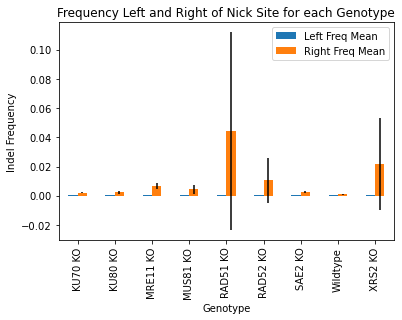

In [101]:
# now combine the individuals tables to create a consolidated table for the left and for the right
tableLeft = pd.merge(gen_freq_left1, gen_freq_left2, on='Genotype')
tableLeft = pd.merge(tableLeft, gen_freq_left3, on='Genotype')
tableLeft['Left Freq Mean'] = tableLeft.iloc[:, 1:4].mean(axis=1)
tableLeft['Left Freq Std'] = tableLeft.iloc[:, 1:4].std(axis=1)

tableRight = pd.merge(gen_freq_right1, gen_freq_right2, on='Genotype')
tableRight = pd.merge(tableRight, gen_freq_right3, on='Genotype')
tableRight['Right Freq Mean'] = tableRight.iloc[:, 1:4].mean(axis=1)
tableRight['Right Freq Std'] = tableRight.iloc[:, 1:4].std(axis=1)

# join tables (can drop the individual frequencies)
OEtableJoined = pd.merge(tableLeft, tableRight, on='Genotype')  # [['Genotype', 'Left Freq Mean', 'Left Freq Std', 'Right Freq Mean', 'Right Freq Std']]

ax = OEtableJoined.plot.bar(x='Genotype', y=['Left Freq Mean', 'Right Freq Mean'], yerr=OEtableJoined[['Left Freq Std', 'Right Freq Std']].T.values)
plt.title('Frequency Left and Right of Nick Site for each Genotype')
plt.ylabel('Indel Frequency')
plt.show()

QUESTION 3: DISPLAY THE INDEL LENGTH FOR EACH GENOTYPE (BOX AND WHISKER)
Note that the indel length is different for each sample name within a replicate, as well as between replicates
Should I be taking the mean of anything? 
Each column has to be a genotype for the box plots to work

In [102]:
# Select the revelant columns: Working with the KO and OE separately
gen_len1 = KO_indels1_df[['Genotype', 'length_of_indel']]
gen_len2 = KO_indels2_df[['Genotype', 'length_of_indel']]
gen_len3 = KO_indels3_df[['Genotype', 'length_of_indel']]

OE_gen_len1 = OE_indels1_df[['Genotype', 'length_of_indel']]
OE_gen_len2 = OE_indels2_df[['Genotype', 'length_of_indel']]
OE_gen_len3 = OE_indels3_df[['Genotype', 'length_of_indel']]


# append the tables together
appended1 = pd.concat([gen_len1, gen_len2], axis=0, ignore_index=True)
appended = pd.concat([appended1, gen_len3], axis=0, ignore_index=True)
indices = list(appended.index.values) 
appended['index'] = indices

OEappended1 = pd.concat([OE_gen_len1, OE_gen_len2], axis=0, ignore_index=True)
OEappended = pd.concat([OEappended1, OE_gen_len3], axis=0, ignore_index=True)
OEindices = list(OEappended.index.values) 
OEappended['index'] = OEindices



# pivot so the genotype are the columns
# the table will have NaN values, but the boxplots method can handle this
# column names: [('length_of_indel', 'KU70 KO'), ('length_of_indel', 'KU80 KO'), ('length_of_indel', 'MRE11 KO'), ('length_of_indel', 'MUS81 KO'), ('length_of_indel', 'RAD51 KO'), ('length_of_indel', 'RAD52 KO'), ('length_of_indel', 'SAE2 KO'), ('length_of_indel', 'Wildtype'), ('length_of_indel', 'XRS2 KO')]
table = pd.pivot_table(appended, index='index', columns="Genotype", aggfunc=lambda x: x)
table.columns = ['KU70 KO', 'KU80 KO', 'MRE11 KO', 'MUS81 KO', 'RAD51 KO', 'RAD52 KO', 'SAE2 KO', 'Wildtype', 'XRS2 KO']

OEtable = pd.pivot_table(OEappended, index='index', columns="Genotype", aggfunc=lambda x: x)
# print(OEtable.columns.tolist())
OEtable.columns = ['MRE11 OE', 'MRE11 KO', 'RAD52 KO', 'Rad51 KO', 'Rad51 OE', 'Rad52 OE', 'SAE2 KO', 'SAE2 OE', 'Wildtype']



# Customize the boxplot
boxprops = dict(linestyle='-', linewidth=2, color='blue')
whiskerprops = dict(linestyle='-', linewidth=2, color='black')
meanprops = dict(marker='o', markerfacecolor='red', markersize=10, markeredgecolor='black')
medianprops = dict(linestyle='-', linewidth=2.5, color='orange')




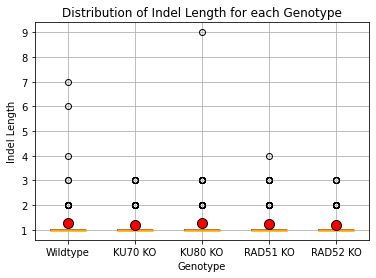

In [103]:
# KO part 1 boxplots
plt.figure()
table.boxplot(column=['Wildtype', 'KU70 KO', 'KU80 KO', 'RAD51 KO', 'RAD52 KO'], showmeans=True, meanprops=meanprops, whiskerprops=whiskerprops, showfliers=True, medianprops=medianprops, boxprops=boxprops)
plt.title('Distribution of Indel Length for each Genotype')
plt.ylabel('Indel Length')
plt.xlabel('Genotype')
plt.show()

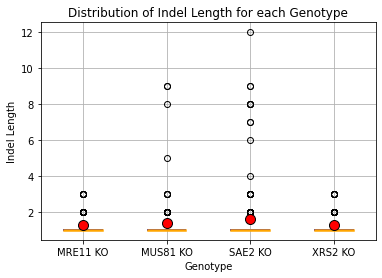

In [104]:
# KO part 2 
table.boxplot(column=['MRE11 KO', 'MUS81 KO', 'SAE2 KO', 'XRS2 KO'], showmeans=True, meanprops=meanprops, whiskerprops=whiskerprops, showfliers=True, medianprops=medianprops, boxprops=boxprops)
plt.title('Distribution of Indel Length for each Genotype')
plt.ylabel('Indel Length')
plt.xlabel('Genotype')
plt.show()

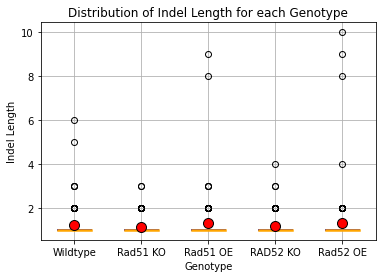

In [105]:
# OE part 1
OEtable.boxplot(column=['Wildtype', 'Rad51 KO', 'Rad51 OE', 'RAD52 KO', 'Rad52 OE'], showmeans=True, meanprops=meanprops, whiskerprops=whiskerprops, showfliers=True, medianprops=medianprops, boxprops=boxprops)
plt.title('Distribution of Indel Length for each Genotype')
plt.ylabel('Indel Length')
plt.xlabel('Genotype')
plt.show()

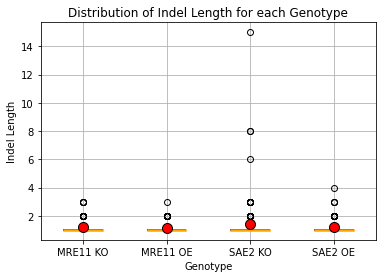

In [106]:
# OE part 2
OEtable.boxplot(column=['MRE11 KO', 'MRE11 OE', 'SAE2 KO', 'SAE2 OE'], showmeans=True, meanprops=meanprops, whiskerprops=whiskerprops, showfliers=True, medianprops=medianprops, boxprops=boxprops)
plt.title('Distribution of Indel Length for each Genotype')
plt.ylabel('Indel Length')
plt.xlabel('Genotype')
plt.show()

QUESTION 3: HISTOGRAM

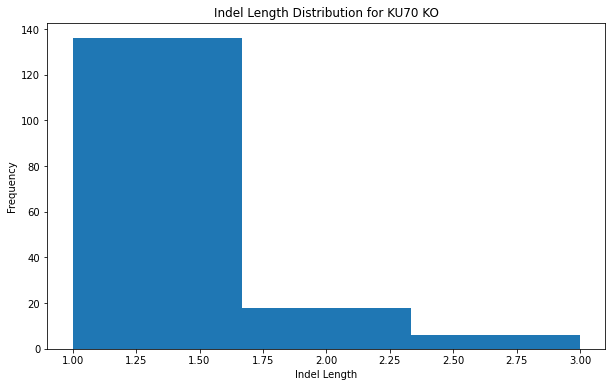

In [130]:
# Create histogram
ax = table['KU70'].plot.hist(bins=3, range=(1, 3))
ax.set_xlabel('Indel Length')
ax.set_ylabel('Frequency')
ax.set_title('Indel Length Distribution for KU70 KO')
plt.show()



QUESTION 4: DISPLAY INDEL FREQUENCY BETWEEN DIFFERENT GENOTYPES
Same as question 2, however don't need to split between the position of the nick (left/right)

In [108]:
# Select the revelant columns, for OE and KO
gen_freq1_all = KO_indels1_df[['Genotype','Freq']]
gen_freq2_all = KO_indels2_df[['Genotype','Freq']]
gen_freq3_all = KO_indels3_df[['Genotype','Freq']]

OE_gen_freq1_all = OE_indels1_df[['Genotype','Freq']]
OE_gen_freq2_all = OE_indels2_df[['Genotype','Freq']]
OE_gen_freq3_all = OE_indels3_df[['Genotype','Freq']]


# Group each table on the genotype name, sum up the frequency
gen_freq1 = gen_freq1_all.groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq1.rename(columns={'Freq': 'Freq 1'}, inplace=True)    # inplace allows the original table to be modified

gen_freq2 = gen_freq2_all.groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq2.rename(columns={'Freq': 'Freq 2'}, inplace=True)   

gen_freq3 = gen_freq3_all.groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
gen_freq3.rename(columns={'Freq': 'Freq 3'}, inplace=True)   


OE_gen_freq1 = OE_gen_freq1_all.groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
OE_gen_freq1.rename(columns={'Freq': 'Freq 1'}, inplace=True)    # inplace allows the original table to be modified

OE_gen_freq2 = OE_gen_freq2_all.groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
OE_gen_freq2.rename(columns={'Freq': 'Freq 2'}, inplace=True)   

OE_gen_freq3 = OE_gen_freq3_all.groupby('Genotype').agg({'Freq': 'sum'}).reset_index()
OE_gen_freq3.rename(columns={'Freq': 'Freq 3'}, inplace=True)   



# now combine the individuals tables to create a consolidated table for the left and for the right
table1 = pd.merge(gen_freq1, gen_freq2, on='Genotype')
table = pd.merge(table1, gen_freq3, on='Genotype')
table['Freq Mean'] = table.iloc[:, 1:4].mean(axis=1)
table['Freq Std'] = table.iloc[:, 1:4].std(axis=1)

OEtable1 = pd.merge(OE_gen_freq1, OE_gen_freq2, on='Genotype')
OEtable = pd.merge(OEtable1, OE_gen_freq3, on='Genotype')
OEtable['Freq Mean'] = OEtable.iloc[:, 1:4].mean(axis=1)
OEtable['Freq Std'] = OEtable.iloc[:, 1:4].std(axis=1)



,Genotype,Freq 1,Freq 2,Freq 3,Freq Mean,Freq Std
0,KU70 KO,0.002128,0.002098,0.002749,0.002325,0.000368
1,KU80 KO,0.001889,0.003638,0.002263,0.002597,0.000921
2,MRE11 KO,0.006619,0.009026,0.005222,0.006956,0.001924
3,MUS81 KO,0.008497,0.002266,0.003300,0.004688,0.003339
4,RAD51 KO,0.005915,0.004984,0.122709,0.044536,0.067701
5,RAD52 KO,0.028502,0.001011,0.002887,0.010800,0.015359
6,SAE2 KO,0.002351,0.002825,0.004166,0.003114,0.000941
7,Wildtype,0.001003,0.001721,0.001738,0.001488,0.000419
8,XRS2 KO,0.003036,0.058564,0.004676,0.022092,0.031596


,Genotype,Freq 1,Freq 2,Freq 3,Freq Mean,Freq Std
0,MRE11 OE,0.011704,0.001206,0.001015,0.004641,0.006117
1,MRE11KO,0.001014,0.006834,0.014760,0.007536,0.006900
2,RAD52 KO,0.000695,0.008939,0.031081,0.013571,0.015714
3,Rad51 KO,0.001416,0.007579,0.007923,0.005639,0.003661
4,Rad51 OE,0.002526,0.001454,0.001516,0.001832,0.000602
5,Rad52 OE,0.010527,0.001126,0.001086,0.004246,0.005440
6,SAE2 KO,0.001299,0.002212,0.002360,0.001957,0.000574
7,SAE2 OE,0.001070,0.000769,0.000817,0.000885,0.000162
8,Wildtype,0.001094,0.001629,0.001748,0.001490,0.000349


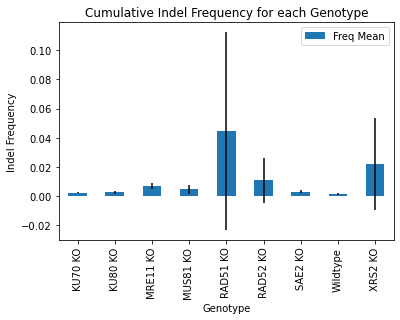

In [109]:
# Bar graph for the KO samples
ax = table.plot.bar(x='Genotype', y=['Freq Mean'], yerr=table[['Freq Std']].T.values)
plt.title('Cumulative Indel Frequency for each Genotype')
plt.ylabel('Indel Frequency')
plt.show()

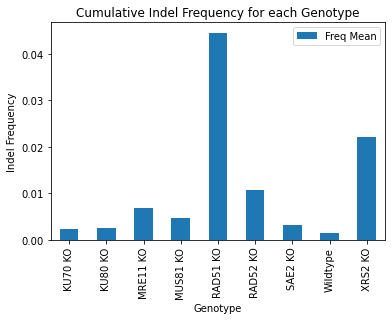

In [111]:
# Same bar graph as above but without error bar lines
ax = table.plot.bar(x='Genotype', y=['Freq Mean'])
plt.title('Cumulative Indel Frequency for each Genotype')
plt.ylabel('Indel Frequency')
plt.show()

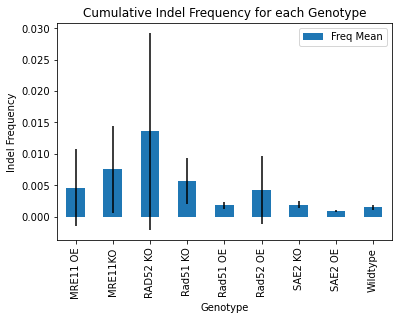

In [110]:
# Bar graph for the OE samples
ax = OEtable.plot.bar(x='Genotype', y=['Freq Mean'], yerr=OEtable[['Freq Std']].T.values)
plt.title('Cumulative Indel Frequency for each Genotype')
plt.ylabel('Indel Frequency')
plt.show()

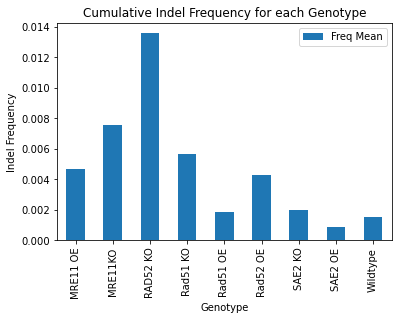

In [112]:
# Bar graph for the OE samples
ax = OEtable.plot.bar(x='Genotype', y=['Freq Mean'])
plt.title('Cumulative Indel Frequency for each Genotype')
plt.ylabel('Indel Frequency')
plt.show()